# Data Processing Pipeline for Machine Learning1. Charger la donnée
2. Visualisation et de l'analyse des données
3. Pré-traité les données
4. Adapter les données à nos modèles : surtout la normalisation
5. Modéliser 
6. Evaluer nos modèles

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement des données

In [2]:
data_stellar = pd.read_csv("./Fichiers_seance_3/star_classification.csv")
data_stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### Analayse des données

In [3]:
data_stellar["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [4]:
data_stellar.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
data_stellar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
data_stellar.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Corrélation

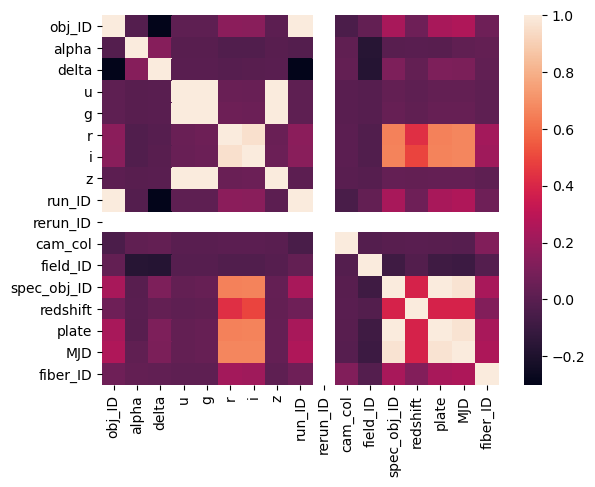

In [7]:
sns.heatmap(data_stellar.corr())
plt.show()

### Visualisation des données

In [15]:
data_stellar.drop(['obj_ID'], axis=1, inplace=True)

In [16]:
features_stellar = data_stellar.copy()
features_stellar.drop(['class'], axis=1, inplace=True)
features_stellar.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD',
       'fiber_ID'],
      dtype='object')

In [17]:
columns = list(features_stellar.columns)

In [20]:
columns

['alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'rerun_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

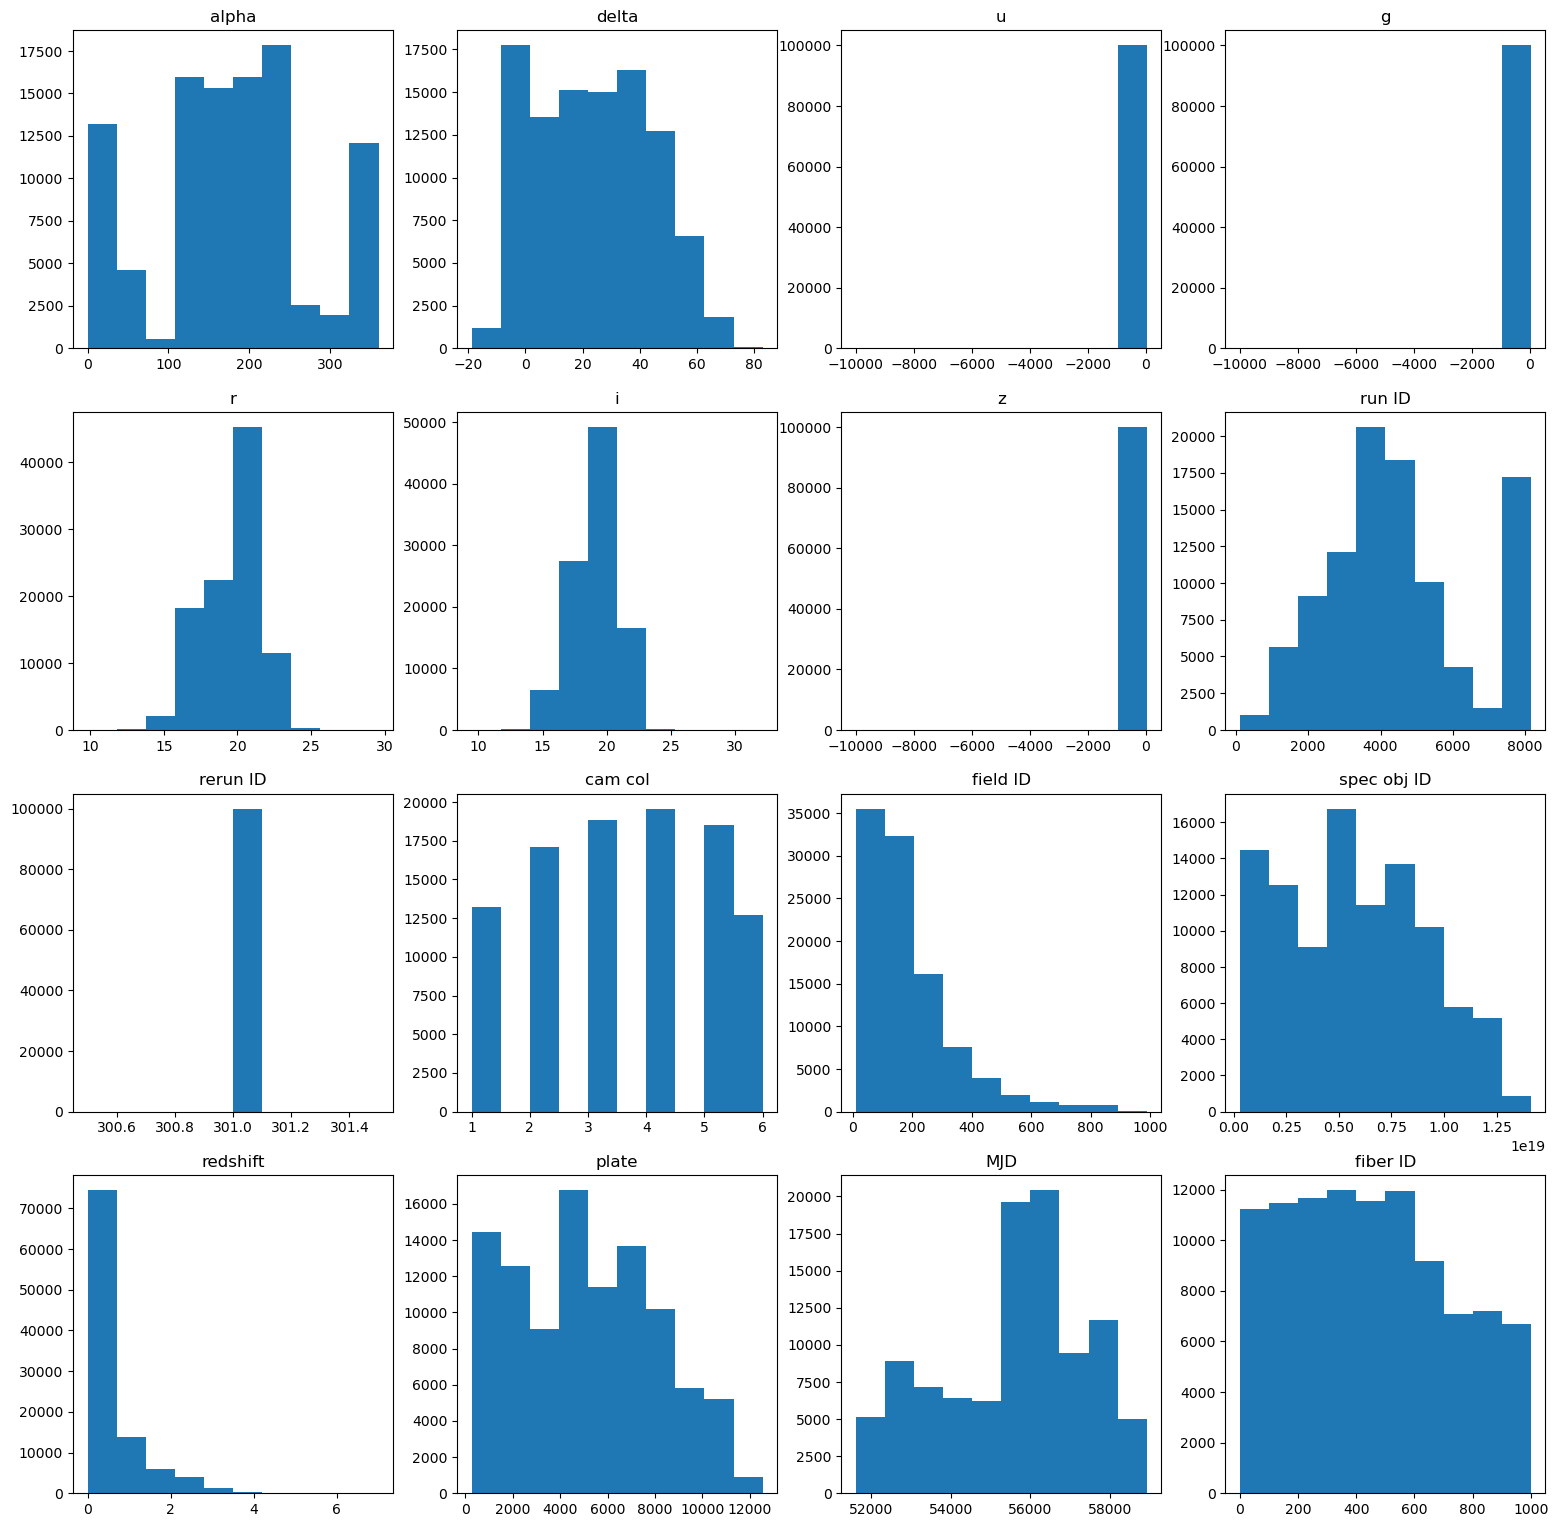

In [23]:
plt.figure(figsize=(19,19))
index = 1
for column in columns : 
    plt.subplot(4,4,index)
    plt.hist(features_stellar[column])
    plt.title(column.replace('_',' '))
    index += 1
plt.show()

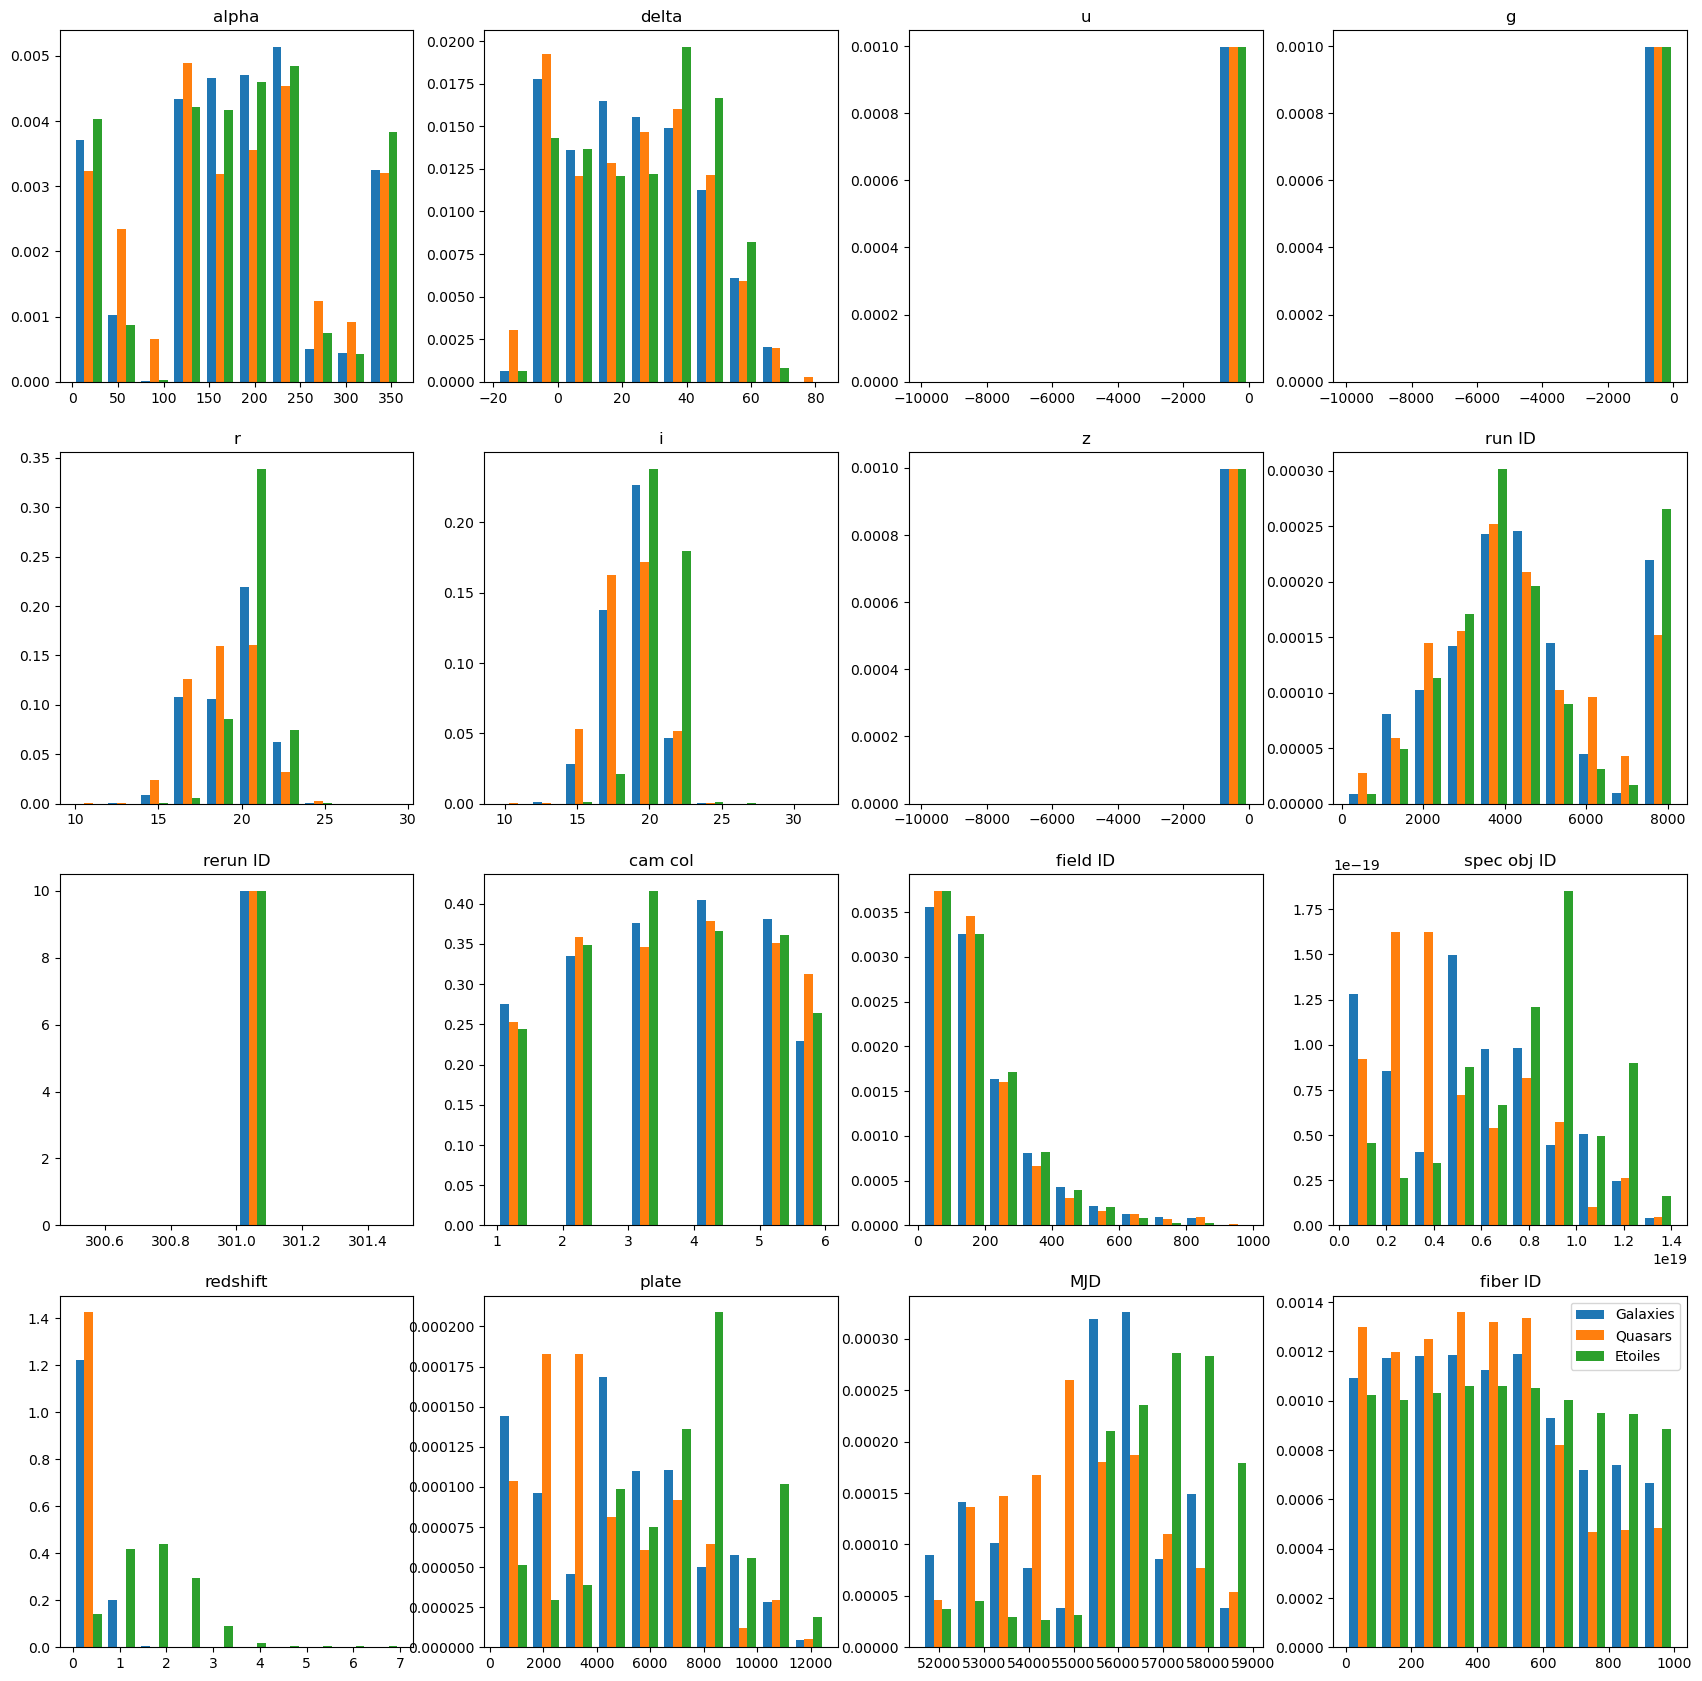

In [26]:
plt.figure(figsize=(21,21))
index = 1 
for column in columns : 
    plt.subplot(4,4,index)
    plt.hist([
        data_stellar[data_stellar["class"]=='GALAXY'][column],
        data_stellar[data_stellar["class"]=='STAR'][column],
        data_stellar[data_stellar["class"]=='QSO'][column],
    ], label=["Galaxies", "Quasars", "Etoiles"], density=True)
    plt.title(column.replace('_',' '))
    index += 1
plt.legend()
plt.show()

In [28]:
data_stellar.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate',
       'MJD', 'fiber_ID'],
      dtype='object')

In [29]:
data_stellar.drop(['rerun_ID', 'z', 'g', 'u'], inplace=True, axis=1)

### Préparation des données

In [31]:
features_stellar = data_stellar.copy()
label = features_stellar['class']
features_stellar.drop(['class'], axis=1, inplace=True)

In [33]:
features_stellar.describe()

,alpha,delta,r,i,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,19.645762,19.084854,4481.366060,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,96.502241,19.644665,1.854760,1.757895,1964.764593,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,0.005528,-18.785328,9.822070,9.469903,109.000000,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,127.518222,5.146771,18.135828,17.732285,3187.000000,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,180.900700,23.645922,20.125290,19.405145,4188.000000,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,233.895005,39.901550,21.044785,20.396495,5326.000000,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,359.999810,83.000519,29.571860,32.141470,8162.000000,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [37]:
features_stellar_scaled = StandardScaler().fit_transform(features_stellar)
features_stellar_scaled = pd.DataFrame(features_stellar_scaled)
features_stellar_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.434604,0.425529,0.403962,0.046007,-0.445535,-0.952553,-0.718947,0.228609,0.079557,0.228633,0.423203,-1.021342
1,-0.339921,0.363402,1.584406,1.185097,0.018646,0.937920,-0.450509,1.797912,0.277096,1.797924,1.420729,-0.081883
2,-0.367251,0.582713,0.519745,0.150019,-0.445535,-0.952553,-0.443798,-0.190037,0.092423,-0.190025,0.001854,-0.551612
3,1.669523,-1.249105,1.059904,0.807610,-0.147278,-0.322395,0.187031,1.358962,0.486770,1.358942,1.354927,1.195196
4,1.737310,-0.150242,-1.697421,-1.767887,1.842792,-0.322395,-0.329712,0.333328,-0.630267,0.333297,0.330860,1.441070
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.430113,-1.360650,1.217564,1.263237,1.677886,-0.952553,2.649947,1.435146,-0.789186,1.435155,1.194571,-0.041515
99996,-1.535053,-0.220744,0.433626,0.382696,1.748632,-1.582710,0.690351,0.843101,-0.235069,0.843071,0.743915,1.529144
99997,0.486606,-0.429360,-0.777184,-0.793290,0.423785,0.307763,0.817859,-0.803813,-0.592984,-0.803786,-0.582617,-1.377309
99998,0.358952,1.146631,0.144547,-0.007005,-0.423140,0.307763,-0.369978,0.546690,-0.166444,0.546691,0.430945,0.075917


In [39]:
features_stellar_scaled.columns = features_stellar.columns

In [40]:
features_stellar_scaled

,alpha,delta,r,i,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,-0.434604,0.425529,0.403962,0.046007,-0.445535,-0.952553,-0.718947,0.228609,0.079557,0.228633,0.423203,-1.021342
1,-0.339921,0.363402,1.584406,1.185097,0.018646,0.937920,-0.450509,1.797912,0.277096,1.797924,1.420729,-0.081883
2,-0.367251,0.582713,0.519745,0.150019,-0.445535,-0.952553,-0.443798,-0.190037,0.092423,-0.190025,0.001854,-0.551612
3,1.669523,-1.249105,1.059904,0.807610,-0.147278,-0.322395,0.187031,1.358962,0.486770,1.358942,1.354927,1.195196
4,1.737310,-0.150242,-1.697421,-1.767887,1.842792,-0.322395,-0.329712,0.333328,-0.630267,0.333297,0.330860,1.441070
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.430113,-1.360650,1.217564,1.263237,1.677886,-0.952553,2.649947,1.435146,-0.789186,1.435155,1.194571,-0.041515
99996,-1.535053,-0.220744,0.433626,0.382696,1.748632,-1.582710,0.690351,0.843101,-0.235069,0.843071,0.743915,1.529144
99997,0.486606,-0.429360,-0.777184,-0.793290,0.423785,0.307763,0.817859,-0.803813,-0.592984,-0.803786,-0.582617,-1.377309
99998,0.358952,1.146631,0.144547,-0.007005,-0.423140,0.307763,-0.369978,0.546690,-0.166444,0.546691,0.430945,0.075917


In [49]:
fv_train, fv_test, label_train, label_test =  train_test_split(features_stellar_scaled, label, test_size=0.3, random_state=23)

### Classification

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=7, p=2)
knn.fit(fv_train,label_train)

KNeighborsClassifier(n_neighbors=7)

In [53]:
label_knn = knn.predict(fv_test) 

In [54]:
from sklearn import metrics

In [55]:
print("Accuracy : ", metrics.accuracy_score(label_test,label_knn))

Accuracy :  0.8931


In [56]:
print("F1-score : ",metrics.f1_score(label_test, label_knn, average='macro'))

F1-score :  0.8755265832853364


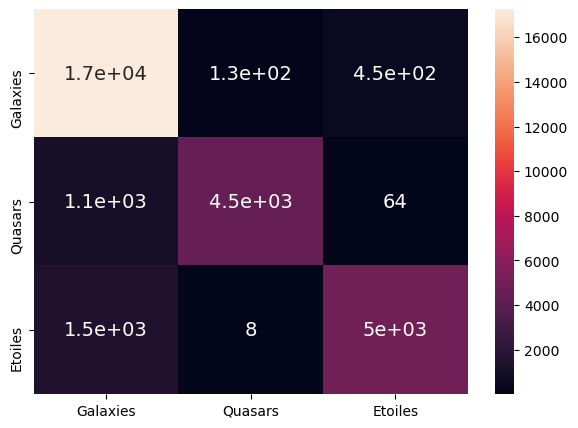

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(figsize=(7,5))
sns.heatmap(metrics.confusion_matrix(label_test,label_knn), annot=True, annot_kws={'size' : 14}, yticklabels=["Galaxies", "Quasars", "Etoiles"], xticklabels=["Galaxies", "Quasars", "Etoiles"])
plt.figure("Matrice de confusions")
plt.show()

### Random Forest

In [58]:
forest = RandomForestClassifier(n_estimators = 100, max_features = 'log2', criterion = 'entropy', class_weight = 'balanced')
forest.fit(fv_train, label_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2')

In [59]:
label_forest = forest.predict(fv_test)

In [61]:
print("Accuracy : ", metrics.accuracy_score(label_test,label_forest)*100)
print("F1-score : ",metrics.f1_score(label_test, label_forest, average='macro')*100)

Accuracy :  97.40333333333334
F1-score :  96.94660524705144


In [63]:
features_stellar.columns

Index(['alpha', 'delta', 'r', 'i', 'run_ID', 'cam_col', 'field_ID',
       'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID'],
      dtype='object')

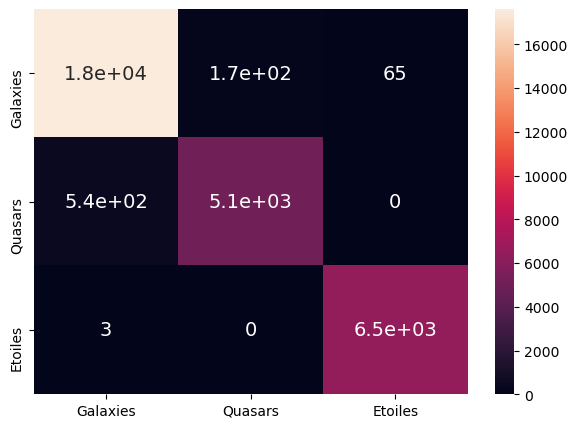

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize=(7,5))
sns.heatmap(metrics.confusion_matrix(label_test,label_forest), annot=True, annot_kws={'size' : 14}, yticklabels=["Galaxies", "Quasars", "Etoiles"], xticklabels=["Galaxies", "Quasars", "Etoiles"])
plt.figure("Matrice de confusions")
plt.show()

### SVM 

In [64]:
svm = SVC(gamma="scale")
svm.fit(fv_train, label_train)

SVC()

In [65]:
label_svm = svm.predict(fv_test)

Accuracy :  95.42
F1-score :  94.78694706519218


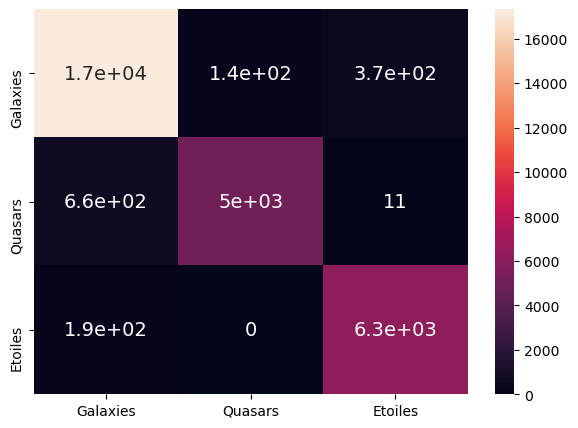

<Figure size 640x480 with 0 Axes>

In [66]:
print("Accuracy : ", metrics.accuracy_score(label_test,label_svm)*100)
print("F1-score : ",metrics.f1_score(label_test, label_svm, average='macro')*100)

plt.figure(figsize=(7,5))
sns.heatmap(metrics.confusion_matrix(label_test,label_svm), annot=True, annot_kws={'size' : 14}, yticklabels=["Galaxies", "Quasars", "Etoiles"], xticklabels=["Galaxies", "Quasars", "Etoiles"])
plt.figure("Matrice de confusions")
plt.show()

In [67]:
label_svm

array(['GALAXY', 'STAR', 'QSO', ..., 'QSO', 'STAR', 'GALAXY'],
      dtype=object)

### Pour une seule ligne 

In [78]:
label_row = svm.predict(fv_test.to_numpy()[0].reshape(1,-1))

In [79]:
label_row

array(['GALAXY'], dtype=object)

In [76]:
fv_test.to_numpy()[0]

array([ 0.11983679, -0.10493869,  0.58050282,  0.28859424,  0.36270885,
       -0.322395  ,  2.03925114,  0.28724647, -0.01627582,  0.28723152,
        0.27667092,  0.73280524])